In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder

   Hours_Studied_Per_Week  Attendance  ... Exam_Score Previous_Scores_encoded
0                      23          84  ...         67                      23
1                      19          64  ...         61                       9
2                      24          98  ...         74                      41
3                      29          89  ...         71                      48
4                      19          92  ...         70                      15

[5 rows x 21 columns]
Mean Absolute Error: 2.45499267583199
Mean Squared Error: 11.723107061523967
Root Mean Squared Error: 3.423902314833758
R-squared: 0.23


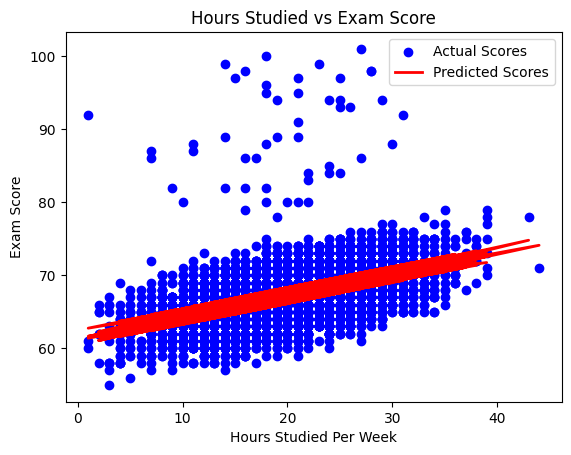

In [9]:
# the max hours inside the "Hours_Studied" column
data = pd.read_csv("StudentPerformanceFactors.csv")

data_copy = data.copy()

label_encoder = LabelEncoder()
data_copy["Previous_Scores_encoded"] = label_encoder.fit_transform(data_copy["Previous_Scores"])


print(data_copy.head(5))

X_hours_studied_with_previous_scores = data_copy[["Hours_Studied_Per_Week","Previous_Scores_encoded"]]
y_scores = data_copy["Exam_Score"]

model = LinearRegression()
model.fit(X_hours_studied_with_previous_scores, y_scores)
y_pred = model.predict(X_hours_studied_with_previous_scores)

mae = mean_absolute_error(y_scores, y_pred)
mse = mean_squared_error(y_scores, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_scores, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {round(r2,2)}")

plt.scatter(X_hours_studied_with_previous_scores["Hours_Studied_Per_Week"], y_scores, color='blue', label='Actual Scores')
plt.plot(X_hours_studied_with_previous_scores["Hours_Studied_Per_Week"], y_pred, color='red', linewidth=2, label='Predicted Scores')
plt.xlabel('Hours Studied Per Week')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')
plt.legend()
plt.show()